# Analyse de données textuelles avec python

Dans le cadre de ce notebook, nous allons analyser plusieurs jeux de données textuelles avec différentes approches :
    - création d'un wordcloud
    - extraction des mots
    - exploration de données textuelles
    - manipulation de dataframes pour les données textuelles
    - création d'un classifieur en utilisant des données textuelles

Pour toutes ces étapes, nous utiliserons de nombreuses bibliothèques dont principalement :
    - nltk
    - scikit-learn

## Créer un wordcloud à partir de données

On importe les bibliothèques nécessaires

In [2]:
import pandas as pd
import sqlite3
from sqlalchemy import create_engine
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

On importe les données depuis une base sqlite

Il s'agit des emails de Hilary Clinton

In [3]:
con = create_engine('sqlite:///database.sqlite')

extr = pd.read_sql_query("Select ExtractedBodyText From Emails where ExtractedBodyText like '%President%' limit 20",con)

In [6]:
con.table_names()

['Aliases', 'EmailReceivers', 'Emails', 'Persons']

On met en commun tous les mots dans une grande chaîne de caractères

In [8]:
cs = ""
for i in range(len(extr.ExtractedBodyText)):
    cs += str(extr.ExtractedBodyText[i])


On construit le nuage avec la fonction associée en se débarassant des stopwords

(-0.5, 399.5, 199.5, -0.5)

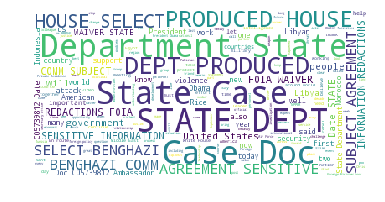

In [79]:
wc = WordCloud(background_color="white", max_words=20000, stopwords=STOPWORDS)
wc.generate(cs)
wc.to_file("wc.png")
plt.imshow(wc)
plt.axis("off")
plt.axis("off")

Essayez de modifier ce nuage de mots

## Quelques bases en traitement des données textuelles

Pour commencer, on importe les bibliothèques dont on aura besoin dans cet exemple

In [11]:
# On utilise la bibliothèque nltk qui est la référence en terme de traitement de données textuelles
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.stem import PorterStemmer
import string
print("J'ai bien importé nltk et string")

J'ai bien importé nltk et string


In [12]:
# On utilise ensuite une bibliothèque de data visualisation matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print("J'ai bien importé matplotlib")

J'ai bien importé matplotlib


In [13]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Les étapes pour explorer des données textuelles :
    1. Charger les données
    2. Tokeniser
    3. Compter
    4. Eliminer les stopwords
    5. Normalisation du texte
    6. Utilisation des n-grams (suite de n mots)

On compte le nombre de mots

In [14]:
from nltk.tokenize import word_tokenize

all_tokens = [t for t in word_tokenize(cs)]

    
print("Nombre total de tokens: {}".format(len(all_tokens)))

Nombre total de tokens: 30506


On vérifie la fréquence des mots

In [15]:
from collections import Counter

total_term_frequency = Counter(all_tokens)

for word, freq in total_term_frequency.most_common(20):
    print("{}\t{}".format(word, freq))

.	1621
,	1308
the	1206
to	764
and	753
of	737
in	437
a	359
that	349
:	258
is	245
our	220
No	213
we	212
TO	211
for	205
's	183
on	166
State	163
with	163


On voit qu'il y a un certain nombre de termes posant problème

Il s'agit de la ponctuation et des stopword

In [17]:
from nltk.corpus import stopwords
import string

print(stopwords.words('english'))
print(len(stopwords.words('english')))
print(string.punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [85]:
#on va donc supprimer la ponctuation et les stopwords
stop_list = stopwords.words('english') + list(string.punctuation)

tokens_no_stop = [token for token in all_tokens
                        if token.lower() not in stop_list]

total_term_frequency_no_stop = Counter(tokens_no_stop)

for word, freq in total_term_frequency_no_stop.most_common(20):
    print("{}\t{}".format(word, freq))

's	183
State	163
Department	156
U.S.	153
Case	106
HOUSE	106
BENGHAZI	106
F-2015-04841	105
Doc	105
Date	105
05/13/2015	105
STATE	105
DEPT	105
PRODUCED	105
SELECT	105
COMM	105
SUBJECT	105
AGREEMENT	105
SENSITIVE	105
INFORMATION	105


On veut normaliser le texte un peu plus

In [86]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
all_tokens_lower = [t.lower() for t in all_tokens]

tokens_normalised = [stemmer.stem(t) for t in all_tokens_lower
                                     if t not in stop_list]

total_term_frequency_normalised = Counter(tokens_normalised)

for word, freq in total_term_frequency_normalised.most_common(20):
    print("{}\t{}".format(word, freq))

state	356
's	183
depart	182
benghazi	160
u.s.	153
hous	136
inform	122
subject	117
case	113
agreement	110
produc	108
sensit	108
redact	106
f-2015-04841	105
doc	105
date	105
05/13/2015	105
dept	105
select	105
comm	105


### Une autre approche : l'utilisation d'un dataframe

On peut aussi travailler sur le DataFrame complet

In [18]:
extr2 = pd.read_sql_query("Select * From Emails",con)

On crée une nouvelle variable

In [32]:
extr2["WithPresident"]=np.where(extr2["ExtractedBodyText"].str.count("President")>0,1,0)

In [27]:
extr2["WithPresident"].value_counts()

0    7363
1     582
Name: WithPresident, dtype: int64

On crée une seconde variable

In [28]:
extr2['length'] = extr2['ExtractedBodyText'].apply(len)

In [30]:
extr2['length'].describe()

count     7945.000000
mean       452.433103
std       2442.636470
min          0.000000
25%          7.000000
50%         59.000000
75%        165.000000
max      78834.000000
Name: length, dtype: float64

### On peut représenter des histogrammes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEFDEF2B00>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001FEFDF7CB70>], dtype=object)

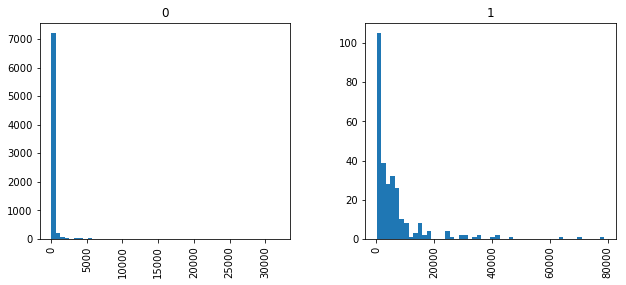

In [33]:
extr2.hist(column='length', by='WithPresident', bins=50,figsize=(10,4))

Essayez de trouver des représentatios intéressantes

## Les n-grams

Une autre approche est de travailler sur des n-grams

In [35]:
from nltk import ngrams

phrases = Counter(ngrams(all_tokens_lower, 3))
for phrase, freq in phrases.most_common(20):
    print("{}\t{}".format(phrase, freq))

('u.s.', 'department', 'of')	105
('case', 'no', '.')	105
('no', '.', 'f-2015-04841')	105
('.', 'f-2015-04841', 'doc')	105
('f-2015-04841', 'doc', 'no')	105
('doc', 'no', '.')	105
('date', ':', '05/13/2015')	105
('state', 'dept', '.')	105
('dept', '.', '-')	105
('.', '-', 'produced')	105
('-', 'produced', 'to')	105
('produced', 'to', 'house')	105
('to', 'house', 'select')	105
('house', 'select', 'benghazi')	105
('select', 'benghazi', 'comm')	105
('benghazi', 'comm', '.')	105
('subject', 'to', 'agreement')	105
('to', 'agreement', 'on')	105
('agreement', 'on', 'sensitive')	105
('on', 'sensitive', 'information')	105


On peut aussi le faire sans les stopwords

In [37]:
phrases = Counter(ngrams(tokens_no_stop, 3))

for phrase, freq in phrases.most_common(20):
    print("{}\t{}".format(phrase, freq))

('Case', 'F-2015-04841', 'Doc')	105
('STATE', 'DEPT', 'PRODUCED')	105
('DEPT', 'PRODUCED', 'HOUSE')	105
('PRODUCED', 'HOUSE', 'SELECT')	105
('HOUSE', 'SELECT', 'BENGHAZI')	105
('SELECT', 'BENGHAZI', 'COMM')	105
('SUBJECT', 'AGREEMENT', 'SENSITIVE')	105
('AGREEMENT', 'SENSITIVE', 'INFORMATION')	105
('SENSITIVE', 'INFORMATION', 'REDACTIONS')	105
('INFORMATION', 'REDACTIONS', 'FOIA')	105
('REDACTIONS', 'FOIA', 'WAIVER')	105
('U.S.', 'Department', 'State')	104
('Department', 'State', 'Case')	104
('State', 'Case', 'F-2015-04841')	104
('Date', '05/13/2015', 'STATE')	102
('05/13/2015', 'STATE', 'DEPT')	102
('BENGHAZI', 'COMM', 'SUBJECT')	102
('COMM', 'SUBJECT', 'AGREEMENT')	102
('F-2015-04841', 'Doc', 'C05739812')	49
('Doc', 'C05739812', 'Date')	49


Comment pourrait-on utiliser ces n-grams ?

## Utilisation du machine learning

Essayons de construire un premier classifieur pour les emails

On utilise scikit-learn et un modèle du type SVM

On va essayer de prédire si un SMS est un spam ou non

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

On récupère les données

In [19]:
messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
from sklearn.model_selection import train_test_split

On divise les données apprentissage / test

In [21]:
x_train, x_test, y_train, y_test = train_test_split(messages["message"],messages["label"], test_size=0.2)

On utilise une méthode classique de traitement de données textuelles
TF-IDF term frequency-inverse document frequency
Il s'agit d'une méthode de feature extraction qui permet d'extraire des fréquences à partir de textes
TF fréquence du mot dans le texte
IDF importance du mot dans le corpus complet


In [22]:
vectorizer = TfidfVectorizer()
vectorised_train_data = vectorizer.fit_transform(x_train)
vectorised_test_data = vectorizer.transform(x_test)

On crée un modèle de classification, ici SVM

In [23]:
classifier = LinearSVC()
classifier.fit(vectorised_train_data, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [25]:
from sklearn.metrics import recall_score, confusion_matrix

In [26]:
#on affiche la matrice de confusion
confusion_matrix(classifier.predict(vectorised_test_data),y_test)

array([[968,   9],
       [  1, 137]])

On a créé un classifieur qui semble assez efficace

Essayez avec un random forrest

In [91]:
from sklearn.ensemble import RandomForestClassifier

...